In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('Data/house_price_dống-da.xlsx')

/usr/local/lib/python3.9/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [3]:
# tiền xử lý
df['type_of_land'] = df['type_of_land'].str.replace('\n ','')

In [4]:
# xử lý giá trị sai
df = df[df['area'] > 0]

In [5]:
# thêm cột price/m2
df['price/m2'] = round(df['price'] / df['area'],2)

In [6]:
df.describe()

,area,price,toilet,bedroom,floor,lat,long,price/m2
count,951.000000,9.260000e+02,551.000000,635.000000,376.000000,951.000000,951.000000,926.000000
mean,144.210568,2.237204e+04,3.646098,3.959055,4.755319,21.015608,105.824421,169.815680
std,758.656729,1.206585e+05,2.170039,2.298311,1.664924,0.006682,0.009605,323.332078
min,6.500000,4.500000e+00,1.000000,1.000000,1.000000,20.998499,105.795544,0.120000
25%,43.000000,3.700000e+03,2.000000,3.000000,4.000000,21.010448,105.819278,34.570000
50%,62.000000,7.000000e+03,4.000000,4.000000,5.000000,21.017006,105.825845,116.000000
75%,126.000000,1.572500e+04,4.000000,5.000000,5.000000,21.020169,105.830091,229.572500
max,20000.000000,3.300000e+06,17.000000,22.000000,11.000000,21.036845,105.841429,8333.330000


## 1. Vẽ biểu đồ phân tích mối liên hệ giữa diện tích với giá nhà, giữa số phòng ngủ với giá nhà, giữa số toilet với giá nhà.

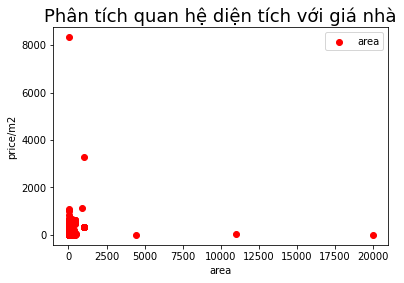

In [7]:
plt.title('Phân tích quan hệ diện tích với giá nhà', fontsize = 18)
plt.rcParams['figure.figsize'] = 15,5
plt.scatter(x = df['area'], y = df['price/m2'], color = 'red', label = 'area')
plt.xlabel('area')
plt.ylabel('price/m2')
plt.legend()
plt.show()

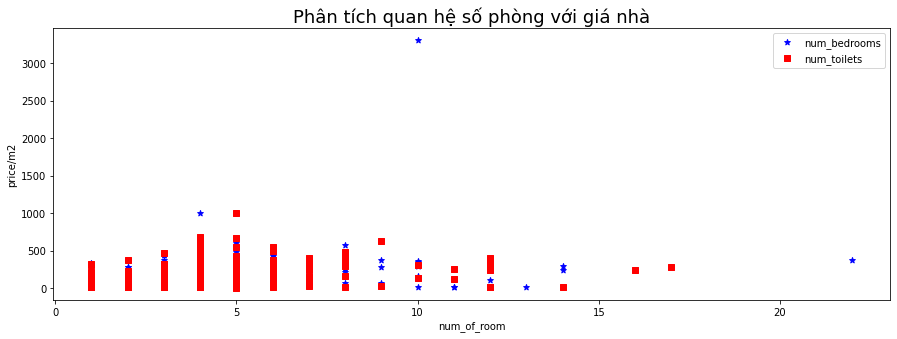

In [8]:
plt.title('Phân tích quan hệ số phòng với giá nhà', fontsize = 18)
plt.scatter(x = df['bedroom'], y = df['price/m2'], color = 'blue', marker= '*', label = 'num_bedrooms')
plt.scatter(x = df['toilet'], y = df['price/m2'], color = 'red', marker= 's', label = 'num_toilets')
plt.xlabel('num_of_room')
plt.ylabel('price/m2')
plt.legend()
plt.show()

## 2. Vẽ biểu đồ so sánh giá nhà trung bình trên 1 m2 giữa các hình thức nhà (type_of_land).

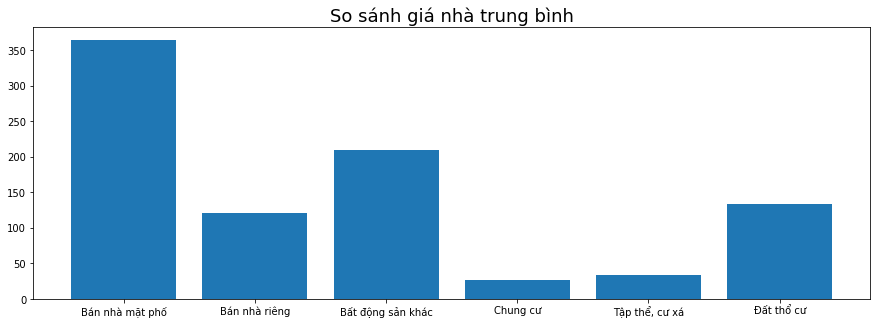

In [9]:
data = df.groupby('type_of_land')[['price/m2']].mean()
plt.title('So sánh giá nhà trung bình', fontsize = 18)
plt.rcParams['figure.figsize'] = 15,5
plt.bar(x = data.index, height = data['price/m2'])
plt.show()

## 3. Vẽ biểu đồ thể hiện tỉ lệ % bài đăng (bản ghi) giữa các hình thức nhà (type_of_land).

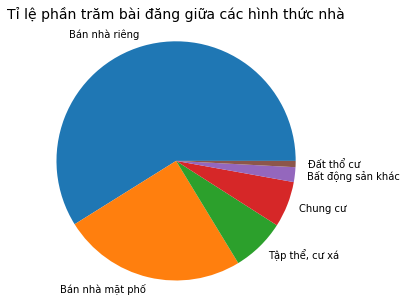

In [10]:
data = df['type_of_land'].value_counts()
plt.title('Tỉ lệ phần trăm bài đăng giữa các hình thức nhà', fontsize = 14)
plt.pie(x = data, labels = data.index, radius = 1.1)
plt.show()

## 4. Vẽ biểu đồ thể hiện sự thay đổi giá nhà trung bình trên 1m2 theo số lượng phòng ngủ.

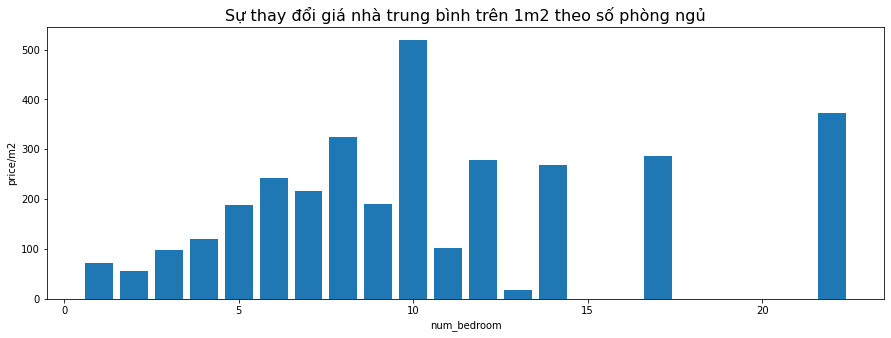

In [11]:
data = df.groupby('bedroom')['price/m2'].mean()
plt.bar(x = data.index, height= data.values)
plt.title('Sự thay đổi giá nhà trung bình trên 1m2 theo số phòng ngủ',fontsize = 16)
plt.xlabel('num_bedroom')
plt.ylabel('price/m2')
plt.show()